In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def imshow(title =" ", image = None, size = 5):
    w,h = image.shape[0],image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Ans 14. Face Detection using Haar Cascade

Number of faces detected: 2


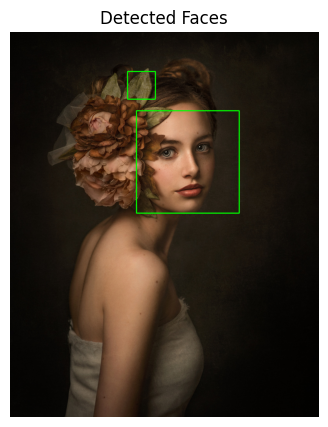

In [ ]:
#  pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

img = cv2.imread(r"C:\hg3\New folder\6.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

print("Number of faces detected:", len(faces))
imshow("Detected Faces", img)


# Ans 15. 

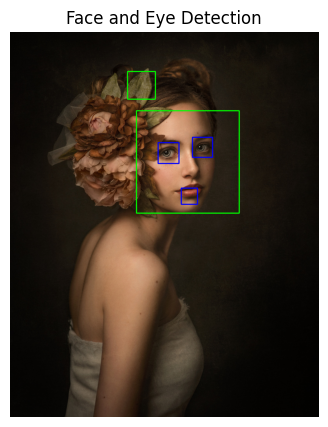

In [4]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

img = cv2.imread(r"C:\hg3\New folder\6.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

imshow("Face and Eye Detection", img)


# Ans 16

In [ ]:
custom_cascade = cv2.CascadeClassifier('cascade/cascade.xml')
img = cv2.imread('test_image.jpg')
if img is None:
    exit()
    
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
objects = custom_cascade.detectMultiScale(
    gray,
    scaleFactor=1.05,
    minNeighbors=8,
    minSize=(50, 50))

for (x, y, w, h) in objects:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('Custom Detector Test', img)
cv2.waitKey(0)
cv2.destroyAllWindows()  

# Ans 17

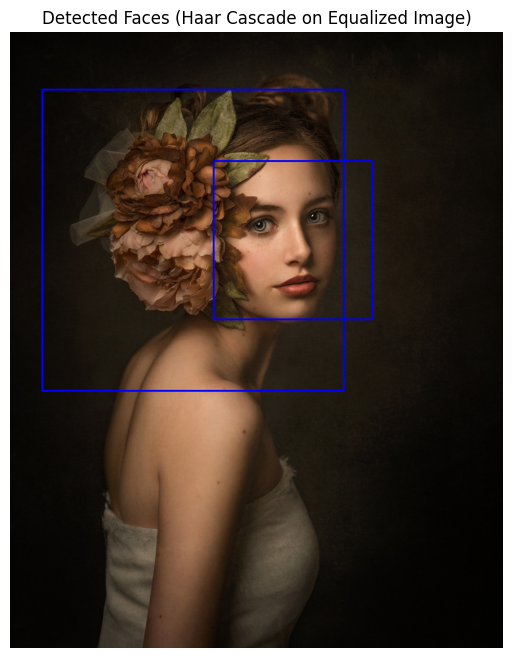

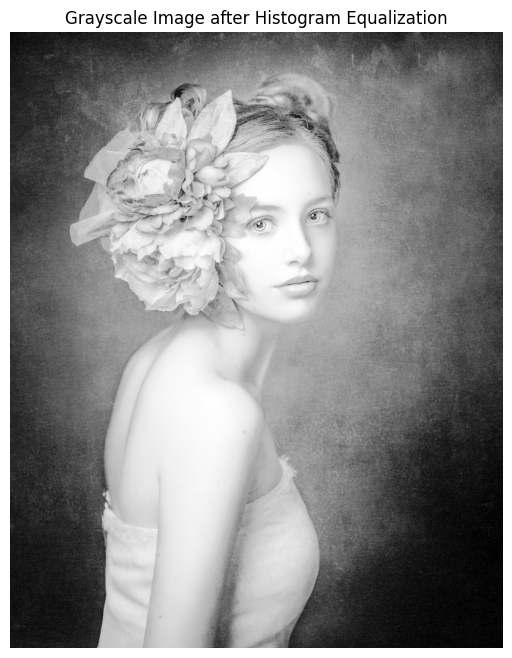

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
img = cv2.imread(r"C:\hg3\New folder\6.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    

# 2. Histogram Equalization
equalized_image = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(equalized_image,scaleFactor=1.1,minNeighbors=5, minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
imshow(title="Detected Faces (Haar Cascade on Equalized Image)", image=img, size=8)   
imshow(title="Grayscale Image after Histogram Equalization", image=equalized_image, size=8)

# Ans 18


In [8]:
def imshow(title=" ", image=None, size=5):
    if image is None:
        return
    if len(image.shape) == 3:
        display_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        display_image = image

    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    cmap_setting = 'gray' if len(image.shape) == 2 else None
    plt.imshow(display_image, cmap=cmap_setting)
    plt.title(title)
    plt.axis("off")
    plt.show()


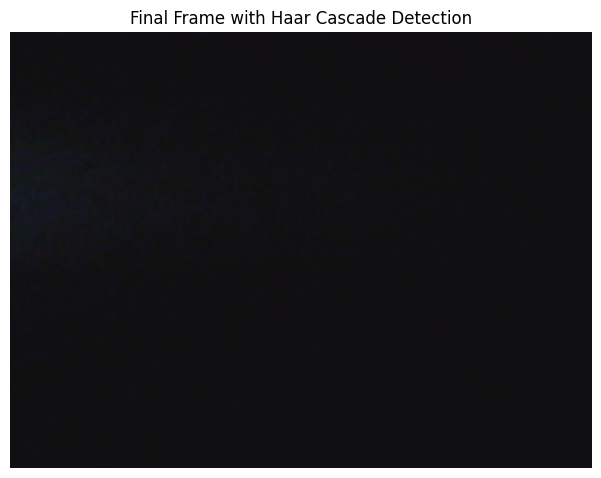

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    exit()

last_frame = None

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    last_frame = frame.copy() 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    cv2.imshow('Live Face Detection Stream', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

if last_frame is not None:
    imshow(title="Final Frame with Haar Cascade Detection", image=last_frame, size=10)